In [3]:
import pandas as pd

df = pd.read_csv("Data.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,0853-NWIFK,Female,0,No,No,45,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,100.30,4483.95,No
4377,8212-CRQXP,Female,0,Yes,No,22,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),80.00,1706.45,No
4378,6980-CDGFC,Female,0,Yes,No,67,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.85,1327.4,No
4379,7691-XVTZH,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),89.95,5974.3,No


In [4]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4381 non-null   object 
 1   gender            4381 non-null   object 
 2   SeniorCitizen     4381 non-null   int64  
 3   Partner           4381 non-null   object 
 4   Dependents        4381 non-null   object 
 5   tenure            4381 non-null   int64  
 6   PhoneService      4381 non-null   object 
 7   MultipleLines     4381 non-null   object 
 8   InternetService   4381 non-null   object 
 9   OnlineSecurity    4381 non-null   object 
 10  OnlineBackup      4381 non-null   object 
 11  DeviceProtection  4380 non-null   object 
 12  TechSupport       4380 non-null   object 
 13  StreamingTV       4380 non-null   object 
 14  StreamingMovies   4380 non-null   object 
 15  Contract          4380 non-null   object 
 16  PaperlessBilling  4380 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,4381,4381,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,4381,2,Male,2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,4381.0,NaN,NaN,NaN,0.159324,0.36602,0.0,0.0,0.0,0.0,1.0
Partner,4381,2,No,2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,4381,2,No,3077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,4381.0,NaN,NaN,NaN,32.214791,24.622737,0.0,8.0,29.0,55.0,72.0
PhoneService,4381,2,Yes,3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,4381,3,No,2108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,4381,3,Fiber optic,1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,4381,3,No,2166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Cell 4 : missing values
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing>0]


PaperlessBilling    0.000228
PaymentMethod       0.000228
MonthlyCharges      0.000228
TechSupport         0.000228
DeviceProtection    0.000228
TotalCharges        0.000228
Churn               0.000228
StreamingMovies     0.000228
StreamingTV         0.000228
Contract            0.000228
dtype: float64

Text(0.5, 1.0, 'Répartition churn (0 = retained, 1 = churn)')

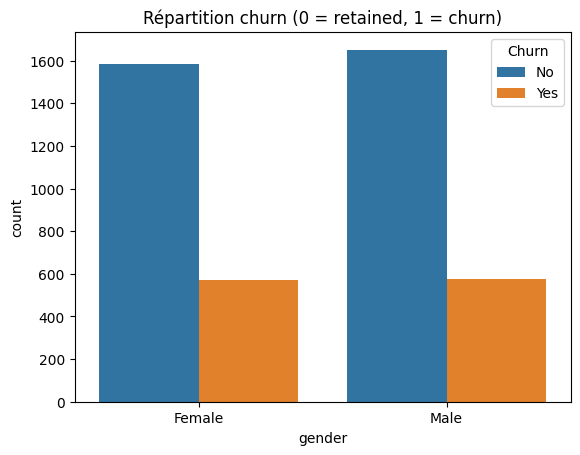

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
# Cell 5 : distribution target

df['Churn'].value_counts(normalize=True).rename('ratio').reset_index().rename(columns={'index':'Churn'})

sns.countplot(x='gender', hue='Churn', data=df)

plt.title('Répartition churn (0 = retained, 1 = churn)')


In [ ]:
# Cell 6 : numerical distributions & boxplots (sélection de colonnes numériques)
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Churn', errors='ignore')
df[num_cols].hist(figsize=(12,10))


Text(0.5, 1.0, 'Matrice de corrélation')

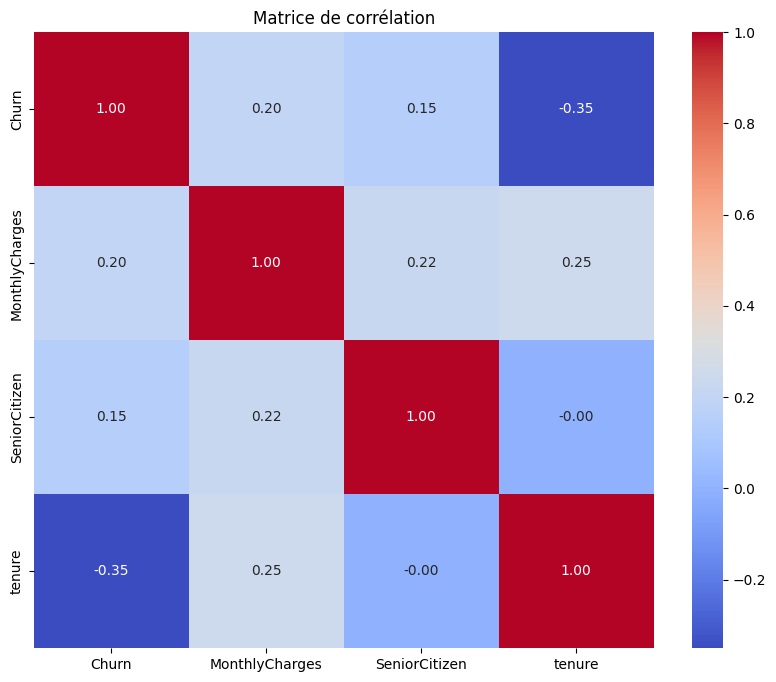

In [10]:
# : corr matrix

num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Churn', errors='ignore')

df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(10,8))
corr = df_corr[num_cols.union(pd.Index(['Churn']))].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation')

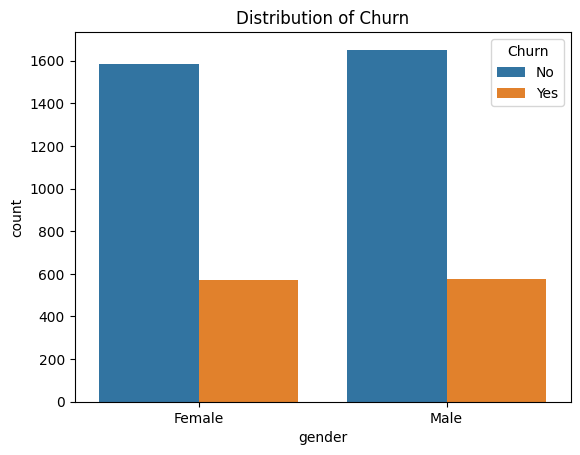

In [12]:
# Count plot for the 'Churn' column
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

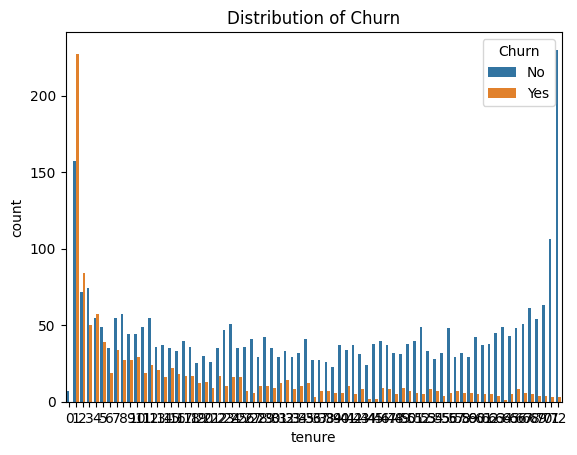

In [13]:
sns.countplot(x='tenure', hue='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()